<a href="https://colab.research.google.com/github/bhaddbaeby/Data-Mining-Course/blob/main/Utari_W_Ardhana_C1__Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POSTEST 2**

*   Nama : Utari W Ardhana
*   NIM : 2109116103
*   Kelas C 2021

In [5]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# (1) Apriori

In [9]:
#Membaca dataset untuk ditampilkan ke dalam tabel tabulasi
df = pd.read_excel("dataset_market_basket.xlsx")
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegatables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000
mean,171.922000,104.14900,103.938000,4.721000,3.259000,112.33900
std,0.211229,0.23402,0.387235,0.530125,0.156166,1.11573
min,171.560000,103.68000,103.350000,4.240000,2.950000,110.94000
25%,171.802500,104.03750,103.700000,4.305000,3.175000,111.19750
50%,171.950000,104.17500,103.985000,4.565000,3.295000,112.57000
75%,172.067500,104.23750,104.137500,4.862500,3.345000,113.25500
max,172.230000,104.57000,104.520000,5.760000,3.500000,113.74000


In [10]:
#jumlahkan hasil dari item set
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegatables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [12]:
#Cek kolom pada itemset
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegatables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [13]:
#mencari kemungkinan dari item
from itertools import permutations

list_item = list(permutations(df.columns, 2))
list_item

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegatables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [15]:
filter = []
for i in list_item:

#Untuk melakukan filterisasi pada kolom item
  if len(df[(df[i[0]]==1) & (df[i[1]]==1)]) >0:
    filter.append(i)
filter

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegatables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegatables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [16]:
#Menghitung jumlah item set dari kemungkinanyang sudah dicek
calculate = {}
for i in filter:
  len_data= len(df[
      (df[i[0]]==1) & (df[i[1]]==1)
  ])
  calculate[str(i)] = len_data
  
calculate


{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegatables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegatables', 'soda')": 1,
 "('can

In [18]:
#Support
sp = [i/len(df)*100 for i in  calculate.values()]
for item,support in calculate.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

('whole milk', 'pastry') support = 5%
('whole milk', 'salty snack') support = 5%
('whole milk', 'sausage') support = 11%
('whole milk', 'semi-finished bread') support = 5%
('whole milk', 'yogurt') support = 5%
('whole milk', 'soda') support = 5%
('whole milk', 'rolls/buns') support = 5%
('whole milk', 'butter') support = 5%
('pastry', 'whole milk') support = 5%
('pastry', 'salty snack') support = 5%
('salty snack', 'whole milk') support = 5%
('salty snack', 'pastry') support = 5%
('sausage', 'whole milk') support = 11%
('sausage', 'semi-finished bread') support = 5%
('sausage', 'yogurt') support = 5%
('sausage', 'hygiene articles') support = 5%
('sausage', 'rolls/buns') support = 11%
('semi-finished bread', 'whole milk') support = 5%
('semi-finished bread', 'sausage') support = 5%
('semi-finished bread', 'yogurt') support = 5%
('yogurt', 'whole milk') support = 5%
('yogurt', 'sausage') support = 5%
('yogurt', 'semi-finished bread') support = 5%
('soda', 'whole milk') support = 5%
('sod

In [19]:
#Confident
for item,ab in calculate.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pastry Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pastry->whole milk Confidence = 100.0%
pastry->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 100.0%
salty snack->pastry Confidence = 100.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 100.0%
yogurt->semi-finished bread Confidence = 100.0%
soda->whole milk Confidence = 33.3

#(2) KNN

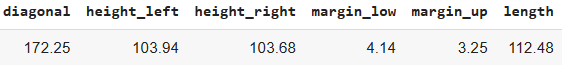
<!-- 1412 -->

In [20]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [21]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import pandas as pd
import numpy as np

df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

# Menyimpan hasil ke file CSV
df.to_csv('hasil_jarak.csv', index=False)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [22]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('sorted.csv', index=False)

# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [23]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Utari W Ardhana

> Nim : 2109116103


Tema : Bank Marketing Dataset by Hari

Struktur : CRISP-DM



# Business Understanding



In business understand phase we basically. Understands the business process, Define and Frame the business problem, Define the business objective, Agree on success criteria

On the example, i use bank_marketing_set.csv by HARIHARANPAVAN on Kaggle to prediction progress marketing on bank.

# Data Understanding

In [26]:
#import module
import pandas as pd

#Read dataset
df_bank = pd.read_csv("bank_marketing_set.csv")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
#Cek info pada dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [28]:
#mendefinisikan dataset dengan menampilkan calculate
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Preparation

In [30]:
#melakukan cleansing atau deskripsi data yang utuh dan missing
noMiss = df_bank.columns[df_bank.isna().sum(axis=0) == 0]
Miss = df_bank.columns[df_bank.isna().sum(axis=0) > 0]

print("Columns with no missing value:", noMiss)
print("Columns with missing values:", Miss)

Columns with no missing value: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Columns with missing values: Index([], dtype='object')


In [41]:
df_bank[df_bank.isnull().sum(axis=1) > 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
